# --------------------  CREDIT CARD ACCEPTANCE--------------------

### IMPORTING MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.metrics import accuracy_score

### READING DATASET

In [3]:
credit_data = pd.read_csv("DATASET.csv")

In [4]:
credit_data.head(5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [5]:
print("Credit Card data shape is:", credit_data.shape[0], "x", credit_data.shape[1])

Credit Card data shape is: 1319 x 12


### CHECKING FOR ANY MISSING VALUE IN DATASET

In [6]:
# Missing values
credit_data.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

#### THERE IS NO MISSING VALUE

### CHECKING FOR ANY DUPLICATE VALUE

In [7]:
print(credit_data.duplicated().sum())

0


#### THERE IS NO DUPLICATE VALUE IN DATASET

In [8]:
print(credit_data)

     card  reports       age  income     share  expenditure owner selfemp  \
0     yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1     yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2     yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3     yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4     yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   
5     yes        0  23.25000  2.5000  0.044438    91.996670    no      no   
6     yes        0  27.91667  3.9600  0.012576    40.833330    no      no   
7     yes        0  29.16667  2.3700  0.076434   150.790000   yes      no   
8     yes        0  37.00000  3.8000  0.245628   777.821700   yes      no   
9     yes        0  28.41667  3.2000  0.019780    52.580000    no      no   
10    yes        0  30.50000  3.9500  0.078025   256.664200   yes      no   
11     no        0  42.00000  1.9800  0.000606     0.000000   yes      no   

In [9]:
print(credit_data.describe(include="all"))

        card      reports          age       income        share  expenditure  \
count   1319  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
unique     2          NaN          NaN          NaN          NaN          NaN   
top      yes          NaN          NaN          NaN          NaN          NaN   
freq    1023          NaN          NaN          NaN          NaN          NaN   
mean     NaN     0.456406    33.213103     3.365376     0.068732   185.057071   
std      NaN     1.345267    10.142783     1.693902     0.094656   272.218917   
min      NaN     0.000000     0.166667     0.210000     0.000109     0.000000   
25%      NaN     0.000000    25.416670     2.243750     0.002316     4.583333   
50%      NaN     0.000000    31.250000     2.900000     0.038827   101.298300   
75%      NaN     0.000000    39.416670     4.000000     0.093617   249.035800   
max      NaN    14.000000    83.500000    13.500000     0.906320  3099.505000   

       owner selfemp   depe

## DATA PREPROCESSING

In [10]:
card = pd.get_dummies(credit_data['card'],drop_first=True)
credit_data['card']=card
credit_data=credit_data.drop(['owner','selfemp','age','months'],axis = 1)
credit_data=credit_data.drop(['majorcards','active'],axis = 1)
credit_data

,card,reports,income,share,expenditure,dependents
0,1,0,4.5200,0.033270,124.983300,3
1,1,0,2.4200,0.005217,9.854167,3
2,1,0,4.5000,0.004156,15.000000,4
3,1,0,2.5400,0.065214,137.869200,0
4,1,0,9.7867,0.067051,546.503300,2
5,1,0,2.5000,0.044438,91.996670,0
6,1,0,3.9600,0.012576,40.833330,2
7,1,0,2.3700,0.076434,150.790000,0
8,1,0,3.8000,0.245628,777.821700,0
9,1,0,3.2000,0.019780,52.580000,0


# Data Visualisation

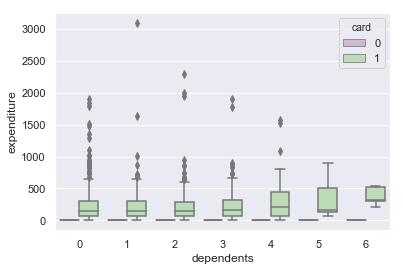

In [11]:
sns.boxplot(x="dependents",y="expenditure",hue = "card",data = credit_data,palette = "PRGn")

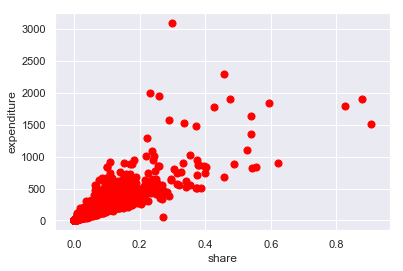

In [12]:
plt.scatter(credit_data["share"],credit_data["expenditure"],c = 'red' , s = 50 ) #c is a parameter to pass the color 
plt.xlabel("share")
plt.ylabel("expenditure")
plt.show()

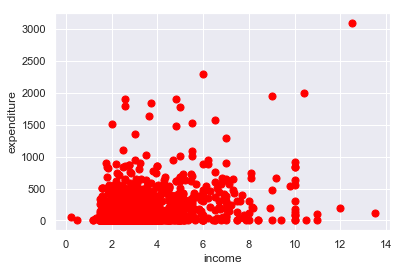

In [13]:
plt.scatter(credit_data["income"],credit_data["expenditure"],c = 'red' , s = 50 ) #c is a parameter to pass the color 
plt.xlabel("income")
plt.ylabel("expenditure")
plt.show()

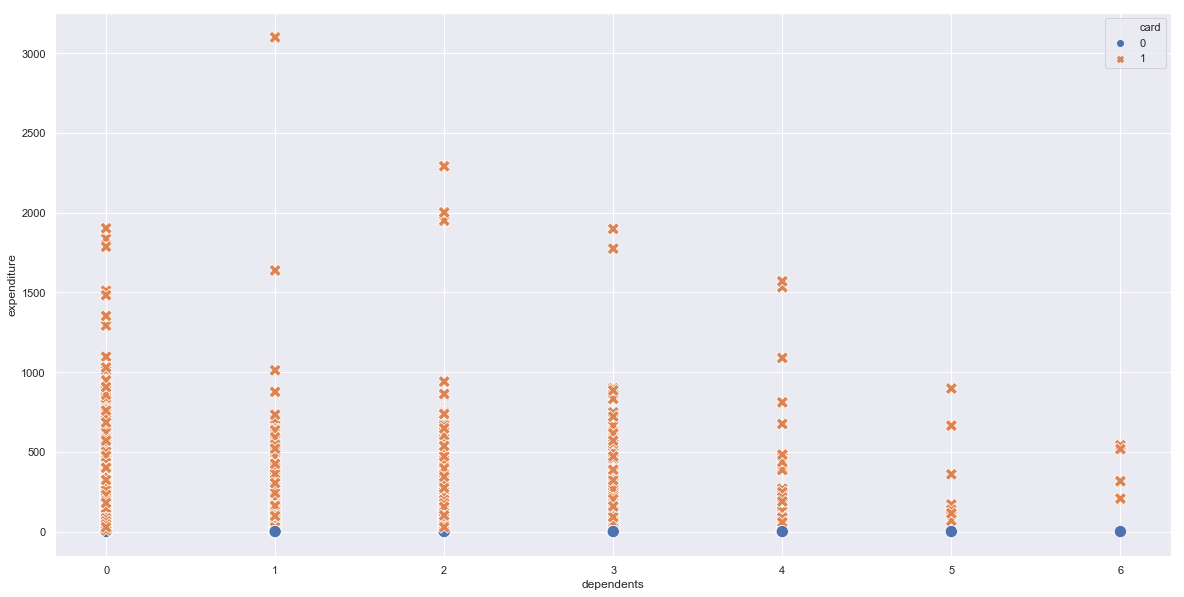

In [14]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = credit_data['dependents'] , y = credit_data["expenditure"],s=150, hue=credit_data['card'],
                style="card" , data = credit_data)
#plt.scatter(features["share"],features["expenditure"],  c = 'red' , s = 50 ,) #c is a parameter to pass the color 
#plt.xlabel("share")
#plt.ylabel("expenditure")
plt.show()

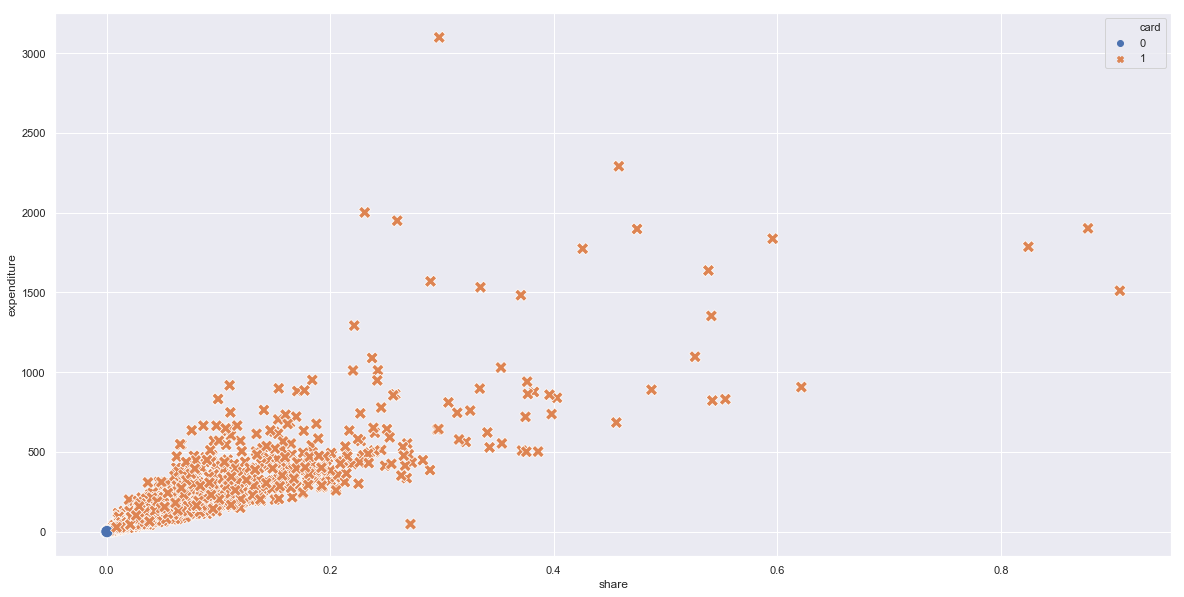

In [15]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = credit_data["share"] , y = credit_data["expenditure"],s=150, hue=credit_data['card'],style="card" , data = credit_data)
plt.show()

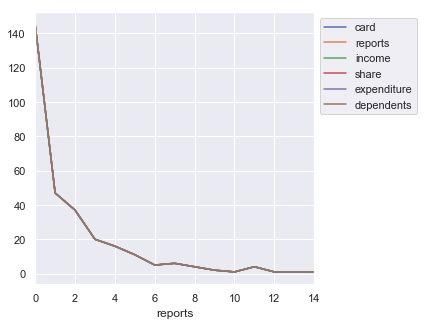

In [16]:
credit_data[credit_data['card']== 0].groupby(credit_data['reports']).count().plot(figsize = (5,5))
plt.legend(bbox_to_anchor =(1,1),loc = 2)

# Correlation

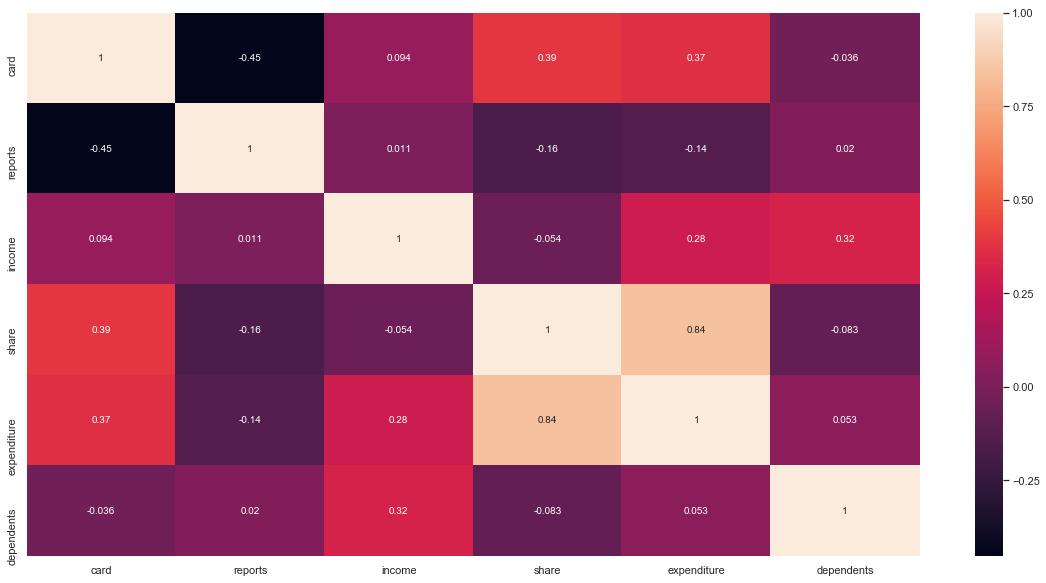

In [17]:
plt.figure(figsize=(20,10))
Var_Corr = credit_data.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

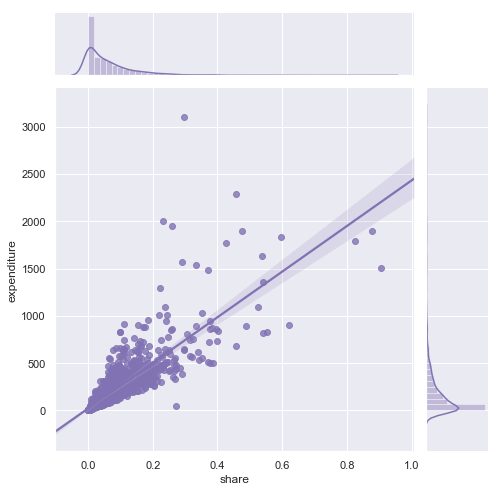

In [18]:
sns.set(style="darkgrid")

g = sns.jointplot("share", "expenditure", data=credit_data, kind="reg",
                   color="m", height=7)

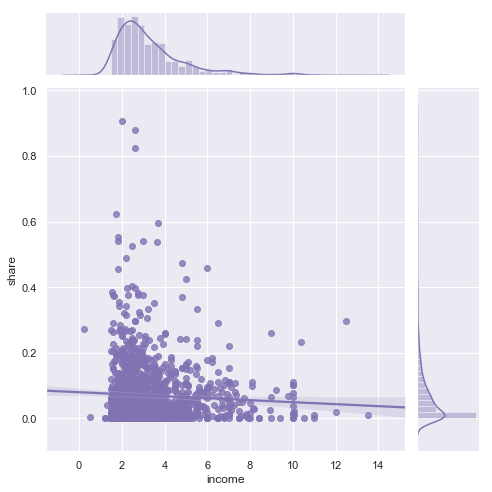

In [19]:
sns.set(style="darkgrid")
g = sns.jointplot("income", "share", data=credit_data, kind="reg",color="m", height=7)

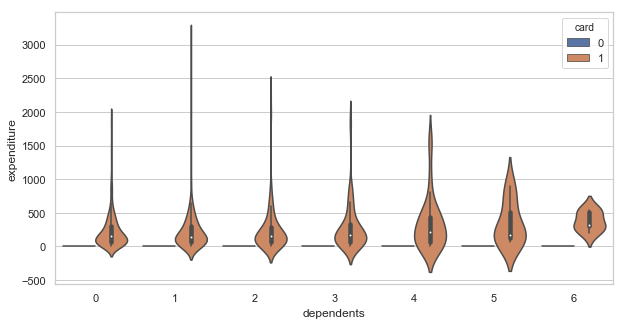

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize= (10,5) )
sns.violinplot(x='dependents' , y='expenditure' ,hue='card' , data = credit_data )

## SPLITTING THE DATA INTO TRAIN & TEST PART

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(credit_data.drop('card',axis = 1),credit_data['card'],
                                                    test_size = 0.2,random_state=0)
X = credit_data.drop('card',axis = 1)
y = credit_data['card']

# 1. K-NN MODEL

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15,metric="euclidean",
                           n_jobs=-1).fit(x_train,y_train)
knn_prediction= knn.predict(x_test)
print('SCORE   :   %.2f%%'%(knn.score(x_test,y_test)*100))

SCORE   :   98.48%


### Confusion Matrix & Classification Report

In [23]:
knn_model = KNeighborsClassifier()
k_predictions = cross_val_predict(knn_model, X, y, cv=5)
print("CONFUSION MATRIX:-\n",confusion_matrix(y, k_predictions))
print(classification_report(y_test,knn_prediction))

CONFUSION MATRIX:-
 [[ 292    4]
 [  23 1000]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       1.00      0.98      0.99       214

   micro avg       0.98      0.98      0.98       264
   macro avg       0.96      0.99      0.98       264
weighted avg       0.99      0.98      0.99       264



### RMSE & MAE

In [24]:
# ROOT MEAN SQUARE ERROR (RMSE)
knn_mse = mean_squared_error(knn_prediction, y_test)
knn_rmse = np.sqrt(knn_mse)
print(' RMSE: %.4f' % knn_rmse)

# MEAN ABSOLUTE ERROR (MAE)
knn_mae = mean_absolute_error(knn_prediction, y_test)
print(' MAE: %.4f' % knn_mae)

 RMSE: 0.1231
 MAE: 0.0152


### ROC Curve

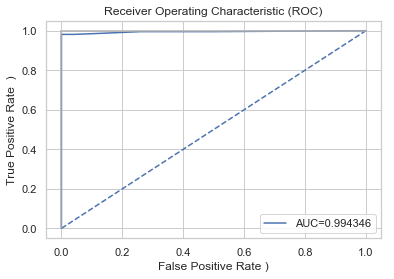

In [25]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, knn.predict_proba(x_test)[:,1])

# Plot ROC curve
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate  )')
plt.xlabel('False Positive Rate )')
plt.show()

# 2. NAIVE BAYES MODEL

In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_prediction=nb.predict(x_test)
print('SCORE   :   %.2f%%'%(nb.score(x_test,y_test)*100))

SCORE   :   98.48%


### Confusion Matrix & Classification Report

In [27]:
nb_model = GaussianNB()
n_predictions = cross_val_predict(nb_model, X, y, cv=5)
print("CONFUSION MATRIX:-\n",confusion_matrix(y, n_predictions))
print(classification_report(y_test,nb_prediction))

CONFUSION MATRIX:-
 [[ 296    0]
 [  21 1002]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       1.00      0.98      0.99       214

   micro avg       0.98      0.98      0.98       264
   macro avg       0.96      0.99      0.98       264
weighted avg       0.99      0.98      0.99       264



### RMSE & MAE

In [28]:
# ROOT MEAN SQUARE ERROR (RMSE)
nb_mse = mean_squared_error(nb_prediction, y_test)
nb_rmse = np.sqrt(nb_mse)
print(' RMSE: %.4f' % nb_rmse)

# MEAN ABSOLUTE ERROR (MAE)
nb_mae = mean_absolute_error(nb_prediction, y_test)
print(' MAE: %.4f' % nb_mae)

 RMSE: 0.1231
 MAE: 0.0152


### ROC Curve

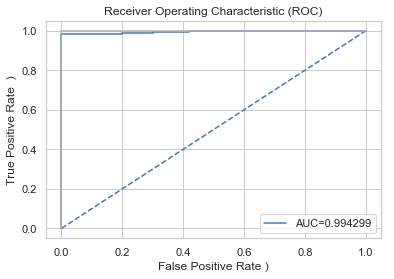

In [29]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, nb.predict_proba(x_test)[:,1])

# Plot ROC curve
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate  )')
plt.xlabel('False Positive Rate )')
plt.show()

# 3. DECISION TREE MODEL

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_prediction=dtc.predict(x_test)
print('SCORE   :   %.2f%%'%(dtc.score(x_test,y_test)*100))
dtc_prediction

SCORE   :   97.35%


array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
      dtype=uint8)

### Confusion Matrix & Classification Report

In [31]:
dtc_model = DecisionTreeClassifier()
d_predictions = cross_val_predict(dtc_model, X, y, cv=5)
print("CONFUSION MATRIX:-\n",confusion_matrix(y, d_predictions))
print(classification_report(y_test,dtc_prediction))

CONFUSION MATRIX:-
 [[ 285   11]
 [  23 1000]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.99      0.98      0.98       214

   micro avg       0.97      0.97      0.97       264
   macro avg       0.95      0.96      0.96       264
weighted avg       0.97      0.97      0.97       264



### RMSE & MAE

In [32]:
# ROOT MEAN SQUARE ERROR (RMSE)
dtc_mse = mean_squared_error(dtc_prediction, y_test)
dtc_rmse = np.sqrt(dtc_mse)
print(' RMSE: %.4f' % dtc_rmse)

# MEAN ABSOLUTE ERROR (MAE)
dtc_mae = mean_absolute_error(dtc_prediction, y_test)
print(' MAE: %.4f' % dtc_mae)

 RMSE: 0.1628
 MAE: 2.9129


### ROC Curve

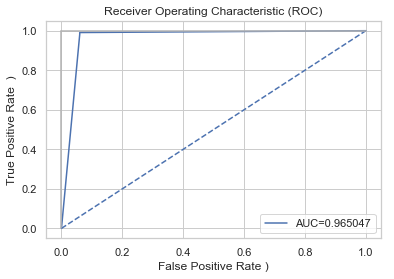

In [33]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, dtc.predict_proba(x_test)[:,1])

# Plot ROC curve
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate  )')
plt.xlabel('False Positive Rate )')
plt.show()

# 4. LINEAR REGRESSION MODEL

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
lm_prediction=lm.predict(x_test).round()
print('SCORE   :   %.2f%%'%(lm.score(x_test,y_test)*100))

SCORE   :   27.85%


### Classification Report

In [35]:
lm_model = LinearRegression()
l_predictions = cross_val_predict(lm_model, X, y, cv=5)
print(classification_report(y_test,lm_prediction))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.92      0.24      0.38        50
         1.0       0.86      0.98      0.92       214
         2.0       0.00      0.00      0.00         0

   micro avg       0.84      0.84      0.84       264
   macro avg       0.45      0.31      0.32       264
weighted avg       0.87      0.84      0.81       264



C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### RMSE & MAE

In [36]:
# ROOT MEAN SQUARE ERROR (RMSE)
lm_mse = mean_squared_error(lm_prediction, y_test)
lm_rmse = np.sqrt(lm_mse)
print(' RMSE: %.4f' % lm_rmse)

# MEAN ABSOLUTE ERROR (MAE)
lm_mae = mean_absolute_error(lm_prediction, y_test)
print(' MAE: %.4f' % lm_mae)

 RMSE: 0.3989
 MAE: 0.1591


### ROC Curve

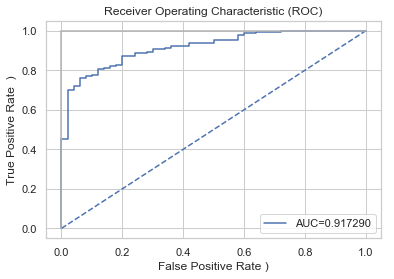

In [37]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lm.predict(x_test))

# Plot ROC curve
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate  )')
plt.xlabel('False Positive Rate )')
plt.show()

# Plotting a bar graph of accuracies of all 4 Classifier models

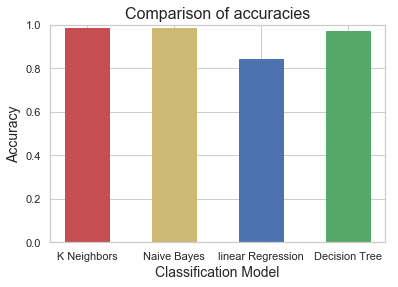

In [38]:
models=['K Neighbors','Naive Bayes','linear Regression','Decision Tree']
accuracies=[accuracy_score(y_test,knn_prediction),accuracy_score(y_test,nb_prediction),
            accuracy_score(y_test,lm_prediction),accuracy_score(y_test,dtc_prediction)]
barlist=plt.bar(models,accuracies,width=0.5,alpha=1.0)
barlist[0].set_color('r')
barlist[1].set_color('y')
barlist[2].set_color('b')
barlist[3].set_color('g')
plt.ylim([0,1.0])
plt.xlabel('Classification Model',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Comparison of accuracies',fontsize=16)
plt.show()

# SINCE BOTH KNN & NAIVE BAYES MODEL HAVE SAME ACCURACY WBOTH OF THEM ARE PREFFERED MODEL FOR THIS DATA SET